# Exploration
Explore the data that you have scraped. Here are some ideas for exploration:

In [1]:
import re
import pandas as pd
import nltk
from prepare import prepare_data

In [15]:
df= prepare_data()
df = df[df.language.isin(['JavaScript', 'Java', 'Python', 'C++', 'HTML', 'Jupyter Notebook',
       'PHP', 'Go', 'TypeScript', 'C', 'Ruby', 'CSS', 'Shell', 'C#', 'Kotlin',
       'Swift', 'R'])]
df.head()

,repo,language,readme_contents
1,rdpeng/ProgrammingAssignment2,R,introduction second programming assignment req...
2,octocat/Spoon-Knife,HTML,well hello repository meant provide example fo...
3,tensorflow/tensorflow,C++,div align center img src tensorflow image tf l...
5,twbs/bootstrap,JavaScript,p align center href getbootstrap img src getbo...
8,tensorflow/models,Python,logo storage googleapis model garden artifact ...


In [16]:
df.shape

(329, 3)

## 1. quantify the data frame

### Check distribution of languages

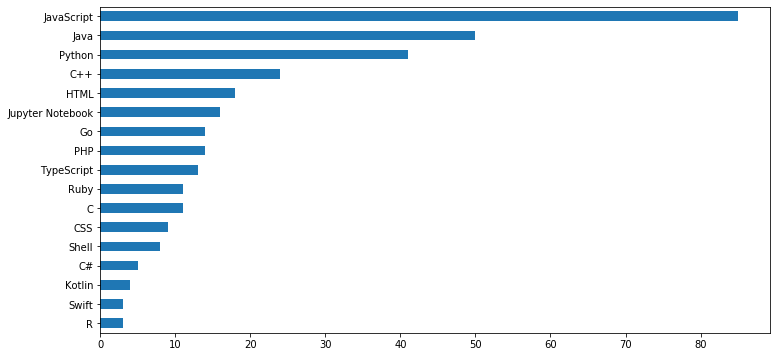

In [17]:
df.language.value_counts(ascending=True).plot.barh(figsize = (12,6))

In [18]:
df.language.value_counts(ascending=True)

R                    3
Swift                3
Kotlin               4
C#                   5
Shell                8
CSS                  9
C                   11
Ruby                11
TypeScript          13
PHP                 14
Go                  14
Jupyter Notebook    16
HTML                18
C++                 24
Python              41
Java                50
JavaScript          85
Name: language, dtype: int64

In [19]:
language = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
language.columns = ['occurance', 'percentage']
language.head(10)

,occurance,percentage
JavaScript,85,0.258359
Java,50,0.151976
Python,41,0.124620
C++,24,0.072948
HTML,18,0.054711
Jupyter Notebook,16,0.048632
Go,14,0.042553
PHP,14,0.042553
TypeScript,13,0.039514
Ruby,11,0.033435


## 2. Expolore some questions

### 1. What are the most common words in READMEs?

In [20]:
all_words = (' '.join(df.readme_contents)).split()
all_words[:10]

['introduction',
 'second',
 'programming',
 'assignment',
 'require',
 'write',
 'r',
 'function',
 'able',
 'cache']

In [21]:
all_words_freq = pd.Series(all_words).value_counts(ascending=True)

In [22]:
all_words_freq.tail(10)

b         1453
data      1530
code      1561
use       1564
td        1578
file      1609
j         1630
master    1694
go        1990
e         3014
dtype: int64

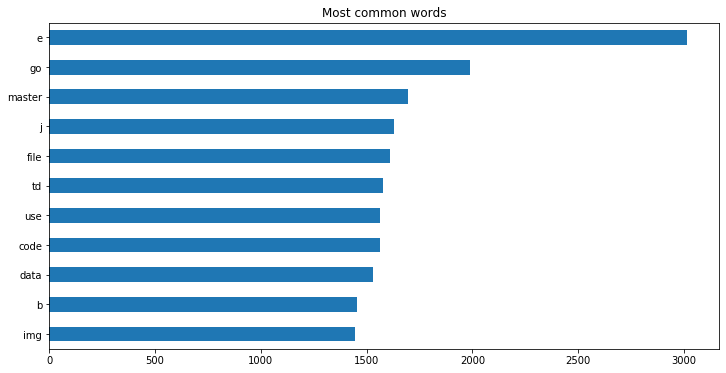

In [23]:
all_words_freq[-11:].plot.barh(figsize = (12,6), title='Most common words')

**Answer**: So the most common word is 'go'

### 2. What does the distribution of IDFs look like for the most common words?

### 3. Does the length of the README vary by programming language?

In [24]:
df['length_of_readme'] = df.readme_contents.apply(len)
df.head()

,repo,language,readme_contents,length_of_readme
1,rdpeng/ProgrammingAssignment2,R,introduction second programming assignment req...,2427
2,octocat/Spoon-Knife,HTML,well hello repository meant provide example fo...,483
3,tensorflow/tensorflow,C++,div align center img src tensorflow image tf l...,8159
5,twbs/bootstrap,JavaScript,p align center href getbootstrap img src getbo...,8227
8,tensorflow/models,Python,logo storage googleapis model garden artifact ...,1628


**Hypothesis Test**

- H0: There is no difference in the length of readme for those whose is python and those whose language is java  
- H1: There is adifference in the length of readme for those whose is python and those whose language is java

Confidence interval = 0.05

In [25]:
x1 = df[df.language == 'Python'].length_of_readme
x2 = df[df.language == 'Java'].length_of_readme

In [26]:
from scipy import stats
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=2.3648898304811277, pvalue=0.020208615466034332)

**Conclusion**: Because p < CI, so we reject HO hypothesis, and there is a difference in the length of readme file between python and java.

### 4. Do different programming languages use a different number of unique words?